In [47]:
import pandas as pd

df = pd.read_csv('log_keyword_20250307.csv')

df.head()

,date,time,requestip,uri,uc,ui,ad_ids,k
0,2025-03-07,10:59:51,2001:e60:923c:4c84:657b:d4ce:dc1:c351,/kd,108338,sinoon,rb-adn-1-bb2d219936ad3e6823d15672752869cd,Rose Embroidered Knit Sleeveless Dress (Cream)
1,2025-03-07,10:59:55,58.230.171.64,/kd,108512,sunny11adn,rb-adn-1-eff98d75107fa18a695b5b5c994607fd,cubic 모어 반팔티
2,2025-03-07,10:59:55,175.209.48.5,/kd,106596,brooksrunning_ad,rb-adn-1-12f8a43895fe12ecb34ec8df1e8b26fc,☆3월말 론칭 예정☆<br>남성 글리세린 GTS 22<br>화이트 (MEDIUM)
3,2025-03-07,10:59:54,119.203.194.25,/kd,105787,flybeach,NaN,샤크 남성 반팔티셔츠
4,2025-03-07,10:59:52,49.172.82.16,/kd,105053,gsshop2022,rb-adn-1-ee8bd852799f72cc8846a55deb121a25,[JAJU/자주] 25SS신상+이월특가+추가쿠폰


In [15]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2740786 entries, 0 to 2740785
Data columns (total 8 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   date       object
 1   time       object
 2   requestip  object
 3   uri        object
 4   uc         object
 5   ui         object
 6   ad_ids     object
 7   k          object
dtypes: object(8)
memory usage: 167.3+ MB


In [16]:
df.describe()

,date,time,requestip,uri,uc,ui,ad_ids,k
count,2740786,2740786,2740786,2740786,2740785,2740282,2697949,2740786
unique,1,86400,932819,1,915,913,1057263,435059
top,2025-03-07,15:13:37,112.144.92.169,/kd,105053,gsshop2022,rb-adn-1-97a893a4f5dba6ac31f01e3c210ce01c,{$product_name}
freq,2740786,81,52574,2740786,909430,909430,26595,104253


In [48]:
# 데이터 결측치 조사
for d in df.columns:
    print(f'{d}: {len(df[d].loc[df[d].isnull()])}')

date: 0
time: 0
requestip: 0
uri: 0
uc: 1
ui: 504
ad_ids: 42837
k: 0


데이터 항목
- date       : 수집날짜
- time       : 수집시간
- requestip  : 수집아이피
- uri        : 수집주소
- uc         : 캠페인번호
- ui         : 광고주ID
- ad_ids     : ADN_UID
- k          : 수집키워드



In [49]:

import matplotlib.pyplot as plt  # Matplotlib 임포트

# ad_ids별로 유니크한 키워드 개수 계산 후 내림차순 정렬
unique_keyword_count = (
    df.groupby('ad_ids')['k']
    .nunique()
    .sort_values(ascending=False)
)

# 결과 출력
print(unique_keyword_count)


ad_ids
rb-adn-1-b3aa89dfb04c19efca20e3ccac86e21d    17944
rb-adn-1-97a893a4f5dba6ac31f01e3c210ce01c    14956
rb-adn-1-843c5bc1e279311d8df154aaa7f323b4    12214
rb-adn-1-6991832200b6820a4c2d863c2b1223f8    11863
rb-adn-1-b64172a6725b65218f107e642d9a0fc3    10150
                                             ...  
rb-adn-1-856ae22d589af5c6cd559390e7687d3c        1
rb-adn-1-856b04a6776fb6a8e1a7211160971a9b        1
rb-adn-1-856b057033649de98a94f3d58f996d9d        1
rb-adn-1-3d4edfb2b251b6e4c8f05e62b4f68750        1
rb-adn-1-29f13af0bdf1b23d9497f7468d917a65        1
Name: k, Length: 1057263, dtype: int64


In [84]:
# ad_ids가 특정 값인 행에서 'k' 컬럼만 선택
filtered_k = df.loc[df['ad_ids'] == 'rb-adn-1-b3aa89dfb04c19efca20e3ccac86e21d', 'k']

# 결과 출력
print(filtered_k.tolist())

['[TAG가  95,000원] 척테일러 1970빈티지 미드나잇클로버 168513C', '[24 신상] 배색 라인 케이프 카라 니트 가디건 (VJCCI2901)', '[반에이크] 세로퀼팅 패딩점퍼_VB2ZPDUD01Z', '메이킹유 88896호킨스팬츠', '[EXR]웨이브 라이트 BB5KD1WAV1_PSP', '[나이키] 클럽 남성 프렌치 테리 조거 FN3802-063', '노스페이스WL 여성 컴피 스웻셔츠 NM5MP31', '[커버낫] [TAG가 169,000] C 로고 카라 바시티 자켓 네이비', '핀턱 벨트 원피스 (VFOAI2508)', '[파타고니아코리아] 키즈 리버서블 레디 프레디 후디 68095P7', '로코엘라 리버티 울 블렌드 하이넥 니트 가디건', 'DKNY 심플 로고 스니커즈 남녀공용 6컬러 택1', '[프로스펙스] (PSM_PW3MJ23W714_) 남성 퀼팅 웰론 자켓 PW3MJ23W', '[인디안]니트에리 구스다운코트 MITEH3W951146', '세인트제임스 메르디앙 모던 R U 엘보 패치 티셔츠 3종택1', '노스페이스 여성 수퍼플렉스 하이브리드 코트 NJ1DQ33', '[JDX]남성 아웃포켓 워싱 팬츠 X2PTU3715', '코어 어센틱 리버시블 스타디움 덕 다운 [런칭 가격 99,900원]', '나이키 드라이핏/헤리티지86 메탈 스우시 남자여성 4종택1', '언더아머더플백 RQD 1300213-042 UA UNDENIABLE DUFFLE 3.0 MD-G', '[이젠벅][네파이젠벅] 24SS 봄 팬츠 남성 3종세트', '코오롱스포츠  남성 원턱 기본형 팬츠 JWPNW23261DGY', '피카소 폭신 따뜻한 여성용 수제 가죽 끈 털신 부츠 퍼 컴포트화', '쟌피엘 남성 체크 풀집업 자켓 _J1-9E017', '라코스테 반팔티셔츠 브이넥 블랙 TH2036-031', '[택가 169,000] N244UDW920 헤론 경량구스 다운 점퍼 택1', '언더아머 UA 라이벌 플리스 기모 긴팔티 1357096-011', '푸마 남여공용 소프트폼 

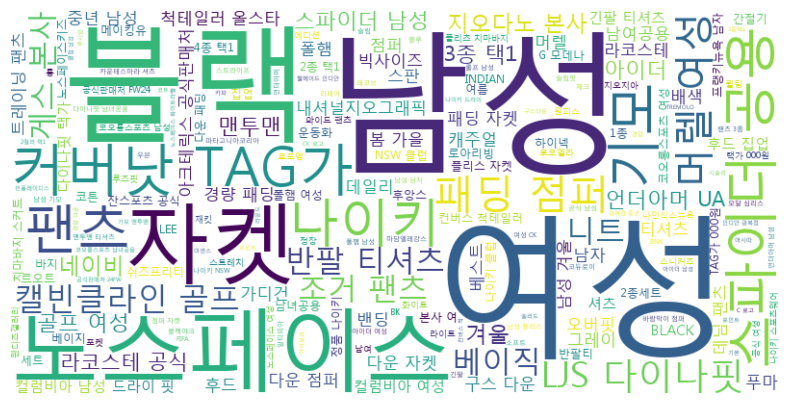

In [85]:
# WordCloud 라이브러리 설치 (미설치 시)
# !pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# filtered_k: 특정 ad_ids에 해당하는 k 리스트 (예: 위에서 추출한 값)
# 예시: filtered_k = ['광고', '광고', '마케팅', '분석', '광고', ...]

# 1) 키워드 리스트를 공백으로 구분된 문자열로 변환
text_data = " ".join(filtered_k)

# 2) 워드 클라우드 생성
wordcloud = WordCloud(
    font_path="//Users/vincent/library/fonts/malgun.ttf",  # 한글 폰트 사용 시 폰트 경로 지정 필요
    width=800,
    height=400,
    background_color="white"
).generate(text_data)

# 3) 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # 축(axes) 비활성화
plt.show()

ad_ids
rb-adn-1-c10c7c0db3b9b546ca4ea2396ba7ce95    28
rb-adn-1-09a25a0194a6d9db3f84b7c591bbf930    19
rb-adn-1-fe59590542f1f97f0c599a61e189dd6f    14
rb-adn-1-733d3a4d7341481cd75e247728d247f2    13
rb-adn-1-5f58f03464ce636f9fbb028600e5bcc8    12
                                             ..
rb-adn-1-56f9852b503233f79d812f405298ba13     1
rb-adn-1-56f99e84407b4596e92c3e0cb043e198     1
rb-adn-1-56f9a6bc019e3de08013d97aed8ac99c     1
rb-adn-1-56f9aaaafcb5a4e2dd53e2f145a70abe     1
rb-adn-1-fffffa17e30e18f781cb0e355b939a38     1
Name: ui, Length: 1057020, dtype: int64


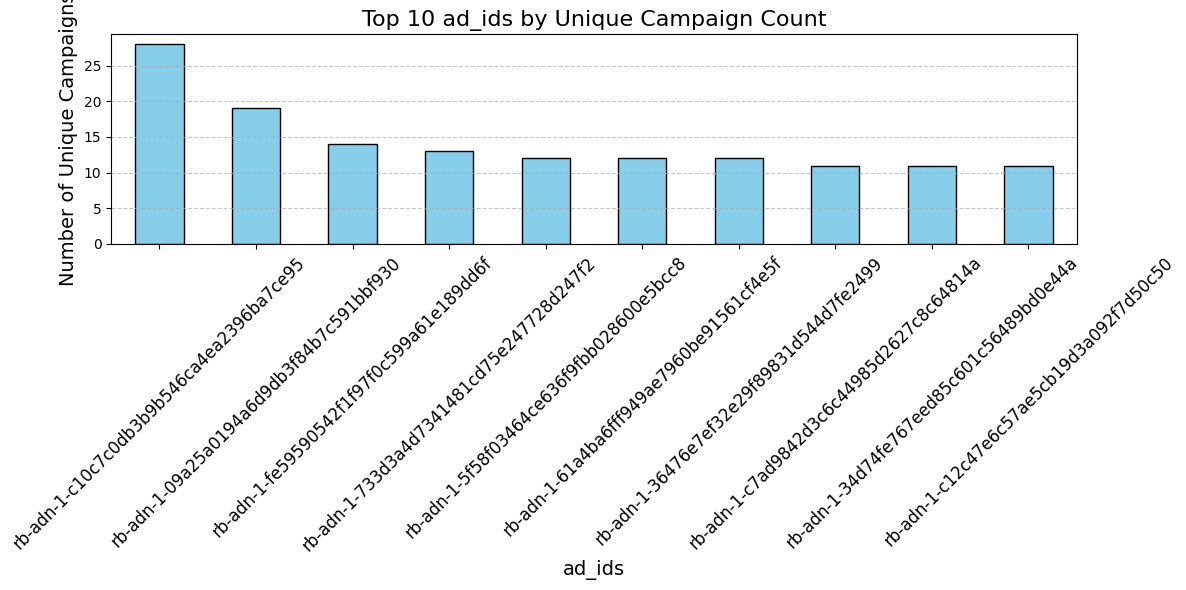

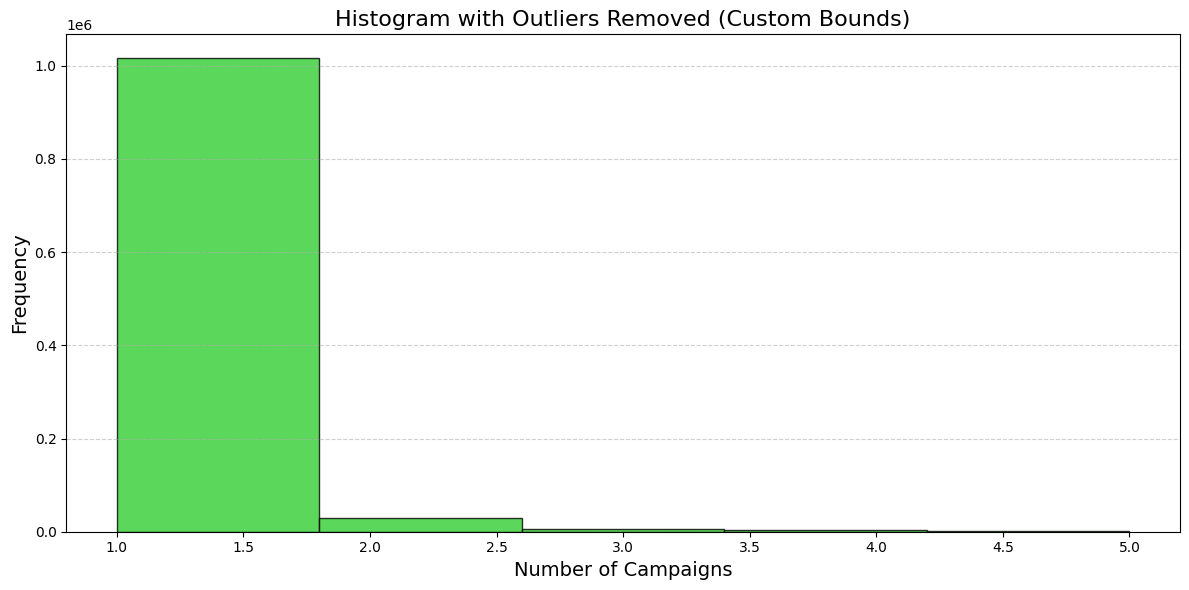

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# 빈값 제거 (ad_ids와 uc 컬럼에서 NaN 값 제거)
df_cleaned = df.dropna(subset=['ad_ids', 'ui'])

# 특정 ad_ids 값을 제거
excluded_values = ['rb-adn-1-8b2cfec6fdc067b5530dbb73a4b26b19']  # 제외할 값 리스트
df_filtered = df_cleaned[~df_cleaned['ad_ids'].isin(excluded_values)]

# ad_ids별로 캠페인 수를 집계
campaign_count = df_filtered.groupby('ad_ids')['ui'].nunique().sort_values(ascending=False)


# 결과 출력
print(campaign_count)

# 상위 10개 데이터 시각화 - Bar Chart
plt.figure(figsize=(12, 6))
campaign_count.head(10).plot(kind='bar', color='skyblue', edgecolor="black")
plt.title('Top 10 ad_ids by Unique Campaign Count', fontsize=16)
plt.xlabel('ad_ids', fontsize=14)
plt.ylabel('Number of Unique Campaigns', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 최소-최대 값 설정 (예: 경험적으로 설정)
lower_bound = 1  # 최소 대체 값
upper_bound = 5  # 최대 대체 값

# 지정된 범위 기반 데이터 필터링
filtered_campaign_count = campaign_count[
    (campaign_count >= lower_bound) & (campaign_count <= upper_bound)
    ]

# 히스토그램 시각화
plt.figure(figsize=(12, 6))
plt.hist(filtered_campaign_count, bins=upper_bound, color='limegreen', edgecolor='black', alpha=0.8)

# 꾸미기
plt.title('Histogram with Outliers Removed (Custom Bounds)', fontsize=16)
plt.xlabel('Number of Campaigns', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
